In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fractions import Fraction as frac
import sys
np.random.seed(42)
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)



##the Sigmoid *Function*

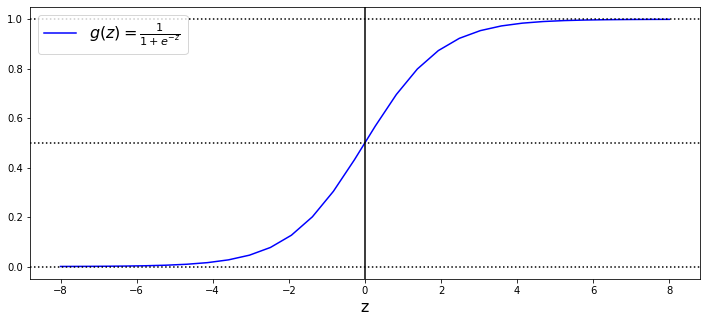

In [ ]:
z = np.linspace(-8,8,30)
plt.figure(figsize=(12,5))
plt.plot(z, 1/(1+np.exp(-z)), color = "blue", label = r'$g(z) = \frac{1}{1+e^{-z}}$')
plt.axvline(x = 0, color='black', linestyle='-')
plt.axhline(y = 1, color='black', linestyle = 'dotted')
plt.axhline(y = 0.5, color='black', linestyle = 'dotted')
plt.axhline(y = 0, color='black', linestyle = 'dotted')
plt.xlabel('z', fontsize = 16)
plt.legend(loc=2, prop={'size': 16})
plt.show()

##the loss function

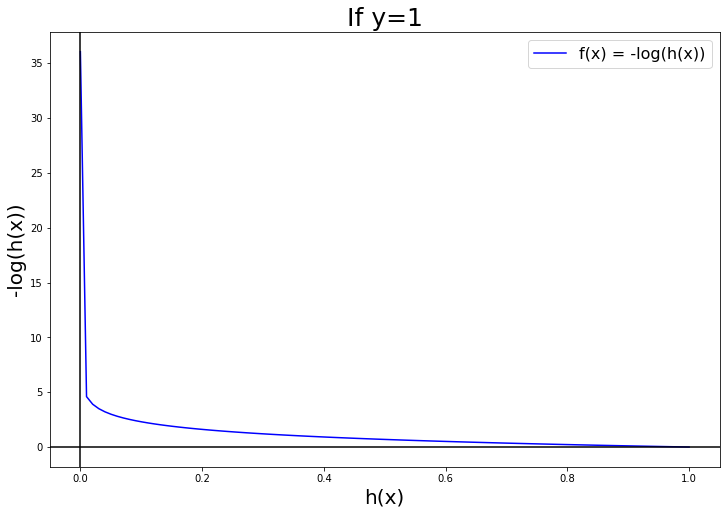

In [ ]:
#the loss function 
epsilon = sys.float_info.epsilon
x = np.linspace(epsilon,1,100)
plt.figure(figsize=(12,8))
plt.plot(x, -np.log(x), color = "blue", label = r'f(x) = -log(h(x))')
plt.axvline(x = 0, color='black')
plt.axhline(y = 0, color='black')
plt.legend(loc=1, prop={'size': 16})
plt.xlabel('h(x)', fontsize = 20)
plt.ylabel('-log(h(x))', fontsize = 20)
plt.title("If y=1",fontsize = 25)
plt.show()


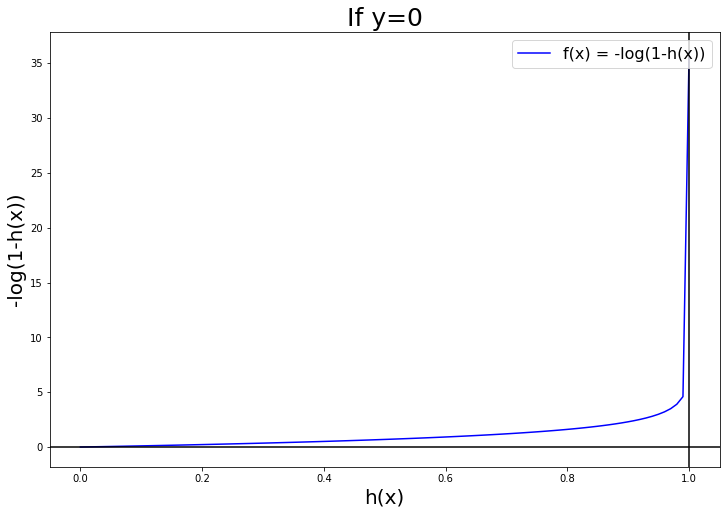

In [ ]:
x = np.linspace(0,1-epsilon,100)
plt.figure(figsize=(12,8))
plt.plot(x, -np.log(1-x), color = "blue", label = r'f(x) = -log(1-h(x))')
plt.axvline(x = 1, color='black')
plt.axhline(y = 0, color='black')
plt.legend(loc=1, prop={'size': 16})
plt.xlabel('h(x)', fontsize = 20)
plt.ylabel('-log(1-h(x))', fontsize = 20)
plt.title("If y=0",fontsize = 25)
plt.show()

#Implementing logistic regression

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))
    return loss


####preprocessing

In [ ]:
#To avoid having to create a separate equation for the bias, add a row of 1 that corresponds to x0.
X_b = np.c_[np.ones((X.shape[0], 1)), X] 

In [ ]:
theta = np.random.randn(len(X[0])+1, 1) #randomly initialize
theta

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])

In [ ]:
#reshaping the y valus
y = y.reshape(len(y), 1)

####batch gradient descent

Text(0, 0.5, 'Cost')

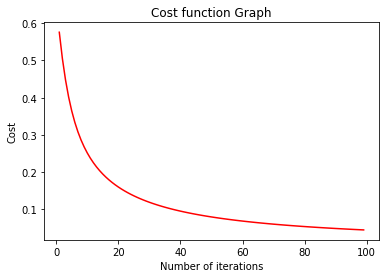

In [ ]:
eta = 0.3  # learning rate
n_iterations = 100
cost_lst =list()
m = X.shape[0]
lambdaa=0.01
alpha=0.5
y_new = np.reshape(y, (len(y), 1)) 
theta = np.random.randn(len(X[0])+1, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(sigmoid(X_b.dot(theta)) - y)
    regularization = lambdaa/m *( (1-alpha) * theta+alpha * np.sign(theta))
    theta = theta - eta * (gradients + regularization)
    cost_value=loss(y, sigmoid(X_b.dot(theta)))
    cost_lst.append(cost_value)
plt.plot(np.arange(1,n_iterations),cost_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

In [ ]:
theta

array([[ 0.77448469],
       [-3.33187343],
       [-0.75054596]])

####stochastic gradient descent

In [ ]:
theta = np.random.randn(len(X[0])+1, 1)
n_epochs = 150
t0, t1 = 10, 100 
cost_lst =list()
def learning_schedule(t):
    return t0 / (t + t1)
for epoch in range(n_epochs):
    for i in range(m):        
        random_index = np.random.randint(m)
        xi = X_b[random_index].reshape(1,3)
        yi = y[random_index].reshape(1,1)
        regularization = lambdaa * ((1-alpha) * theta+alpha * np.sign(theta))
        gradients =  xi.T.dot(sigmoid(xi.dot(theta)) - yi) 
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * (gradients +regularization)
    cost_value=loss(y, sigmoid(X_b.dot(theta)))
    cost_lst.append(cost_value)


Text(0, 0.5, 'Cost')

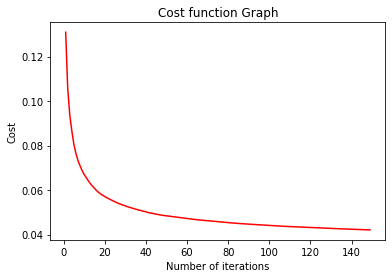

In [ ]:
plt.plot(np.arange(1,n_epochs),cost_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

In [ ]:
theta

array([[ 0.50221441],
       [-3.37599797],
       [-0.46568793]])

####mini batch gradient descent

In [ ]:
theta = np.random.randn(len(X[0])+1, 1)
t0, t1 = 200, 1000
batch_size=20
n_epochs = 100
cost_lst =list()
t=0
def learning_schedule(t):
    return t0 / (t + t1)
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        t+= 1
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        regularization = lambdaa/batch_size * ((1-alpha) * theta+alpha * np.sign(theta))
        gradients = 1/batch_size * xi.T.dot(sigmoid(xi.dot(theta)) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * (gradients+regularization)
    cost_value=loss(y, sigmoid(X_b.dot(theta)))
    cost_lst.append(cost_value)

In [ ]:
theta

array([[-0.56135869],
       [-4.40345274],
       [ 0.57604428]])

Text(0, 0.5, 'Cost')

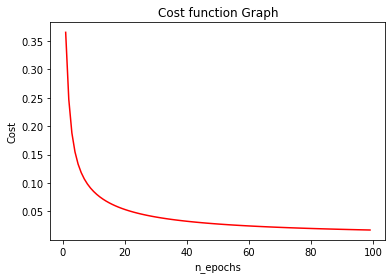

In [ ]:
plt.plot(np.arange(1,n_epochs),cost_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('n_epochs')
plt.ylabel('Cost')